### Basic Neural Network

A notebook to demonstrate a basic Neural Network using the Keras API. We'll train a 3 layer Neural Network for regression on the Boston Housing Price Prediction dataset.

Run on [Google Colab](https://colab.research.google.com/drive/1BOelSpd4NZmFFDbZR0itCQMh8ilNbqBk?usp=sharing). 

In [54]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt

Load and prepare the [Boston Housing Dataset](https://www.kaggle.com/c/boston-housing).

This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).
Variables in order:

```
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```

In [12]:
# Load from Keras Datasets
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.boston_housing.load_data(test_split=0.2, seed=42)
print('Sample feature vector before scaling: ', train_features[:1])
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)
print('Sample feature vector after scaling: ', train_features[:1])

train_samples, n_features = train_features.shape
print('Number of training samples = ', train_samples)

Sample feature vector before scaling:  [[9.1780e-02 0.0000e+00 4.0500e+00 0.0000e+00 5.1000e-01 6.4160e+00
  8.4100e+01 2.6463e+00 5.0000e+00 2.9600e+02 1.6600e+01 3.9550e+02
  9.0400e+00]]
Sample feature vector after scaling:  [[-0.40544083 -0.4772386  -1.03573484 -0.27288841 -0.38295762  0.18146713
   0.53502689 -0.53549508 -0.53418401 -0.66653121 -0.87342724  0.42641956
  -0.51858417]]
Number of training samples =  404


Build the `tf.keras` model architecture using the Sequential Class.

Our model has two hidden layers with `20` and `10` neurons each and a final output layer to predict the final price. 

We are using the Mean Square Error loss for this regression problem.

In [64]:
# define model architecture
model = Sequential()
model.add(Dense(20, activation='relu', name='hidden_layer1', kernel_initializer='he_normal', input_shape=(n_features,))) # hidden layer
model.add(Dense(10, activation='relu', name='hidden_layer2', kernel_initializer='he_normal'))
model.add(Dense(1, name='output')) # output layer 


# compile the model
model.compile(optimizer='adam', loss='mse')

Model Summary

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 20)                280       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
None


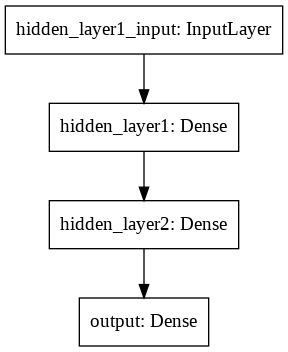

In [65]:
print(model.summary())
tf.keras.utils.plot_model(model)

Model fitting


In [66]:
# fit the model

# Use the Early Stopping Callback to terminate training if validation loss doesn't
# improve within the specified epochs
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=50, verbose=0)

history = model.fit(train_features, train_labels, epochs=800,
                    batch_size=32, verbose=1,
                    validation_split=0.2, callbacks=[es])

Epoch 1/800
11/11 [==============================] - 1s 17ms/step - loss: 581.7521 - val_loss: 649.5121
Epoch 2/800
11/11 [==============================] - 0s 6ms/step - loss: 610.8183 - val_loss: 639.8145
Epoch 3/800
11/11 [==============================] - 0s 5ms/step - loss: 551.0458 - val_loss: 630.4604
Epoch 4/800
11/11 [==============================] - 0s 5ms/step - loss: 566.0229 - val_loss: 620.3592
Epoch 5/800
11/11 [==============================] - 0s 5ms/step - loss: 571.9198 - val_loss: 608.9277
Epoch 6/800
11/11 [==============================] - 0s 6ms/step - loss: 546.4432 - val_loss: 595.7844
Epoch 7/800
11/11 [==============================] - 0s 5ms/step - loss: 539.4675 - val_loss: 580.1557
Epoch 8/800
11/11 [==============================] - 0s 5ms/step - loss: 493.8185 - val_loss: 561.0392
Epoch 9/800
11/11 [==============================] - 0s 5ms/step - loss: 511.5895 - val_loss: 538.8278
Epoch 10/800
11/11 [==============================] - 0s 5ms/step - loss

## Model Evaluation

Train and Validation loss curves

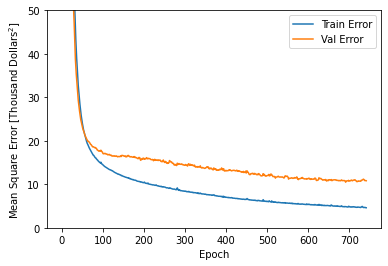

In [67]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def plot_history(hist):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    plt.legend()
    plt.ylim([0, 50])
    
plot_history(hist)

Performance on the test set

In [68]:
mse = model.evaluate(test_features, test_labels)
print("Root Mean Square Error on Test Data: ", np.sqrt(mse))

4/4 [==============================] - 0s 2ms/step - loss: 11.4114
Root Mean Square Error on Test Data:  3.378083410015865


We are able to predict housing prices on the Boston test dataset within a Root Mean Square Error of 3.37